In [1]:
import geopandas as gpd
import pygmt as gmt
import matplotlib.pyplot as plt

In [2]:
df = gpd.read_file(r'data/BLM_CO_SMA_20210916.shp')
df.to_crs("EPSG:4326", inplace=True)
public_land = df[df.adm_manage.isin(['USFS', 'BOR', 'BLM', 'NPS',
                                     'STA', 'LOCAL', 'USFW', 'USFS_NG', 'USFS_LU'])]
private_land = df[df.adm_manage.isin(['BIA', 'PRI', 'DOD', 'OTHER',None])]

<AxesSubplot:>

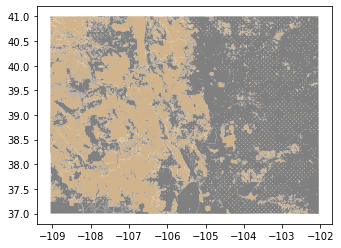

In [3]:
fig, ax = plt.subplots(1)
public_land.plot(ax=ax, color='tan')
private_land.plot(ax=ax, color='gray')

In [4]:
region = [-109.5, -101.5, 36.75, 41.25]
fig = gmt.Figure()
fig.basemap(region=region, projection="M4i", frame=["a",'+t"Colorado Public Land"'])
fig.grdimage("@srtm_relief_03s", shading=True, cmap='oleron')
fig.plot(data=public_land, color='lightblue', label='Public',transparency=50)
fig.plot(data=private_land, color='orange', label='Private',transparency=50)

fig.text(text=["https://www.blm.gov/site-page/services-geospatial-gis-data-colorado"], 
         x=-106.8, y=36.9, font="5p,Helvetica-Bold,white")
fig.legend()

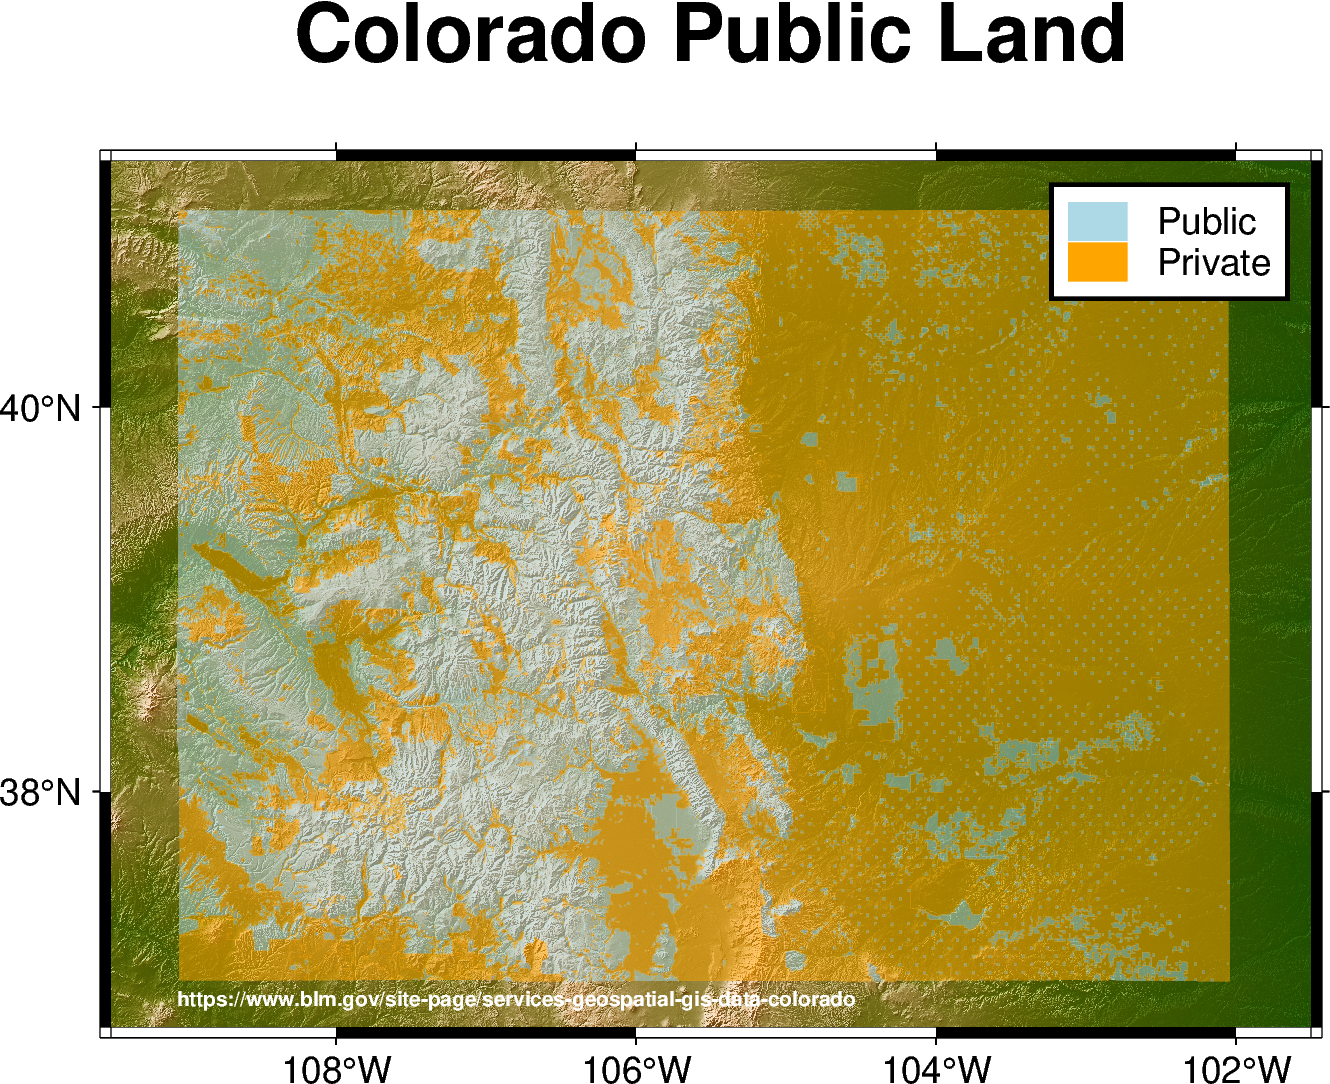

In [5]:
fig.show(width=1000)

In [6]:
fig.savefig('Day_22.png')